In [3]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime
from math import sqrt

import warnings
warnings.filterwarnings('ignore')


try:
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc
except:
    !pip install mplfinance mpl_finance
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc

In [5]:
nflx = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Netflix%20Stock%20Data%20-%20Live%20and%20Latest/Netflix_stock_history.csv")
print(nflx.head())

         Date      Open      High       Low     Close     Volume  Dividends  \
0  2002-05-23  1.156429  1.242857  1.145714  1.196429  104790000          0   
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   11104800          0   
2  2002-05-28  1.213571  1.232143  1.157143  1.157143    6609400          0   
3  2002-05-29  1.164286  1.164286  1.085714  1.103571    6757800          0   
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   10154200          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


<AxesSubplot:>

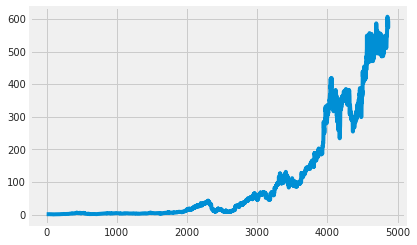

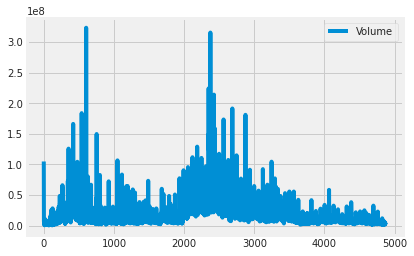

In [7]:
nflx["Close"].plot()
nflx[["Volume"]].plot()

In [8]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=nflx['Date'],
        open=nflx['Open'],
        high=nflx['High'],
        low=nflx['Low'],
        close=nflx['Close']))
fig.show()

In [9]:
nflx['SMA5'] = nflx.Close.rolling(5).mean()
nflx['SMA20'] = nflx.Close.rolling(20).mean()
nflx['SMA50'] = nflx.Close.rolling(50).mean()
nflx['SMA200'] = nflx.Close.rolling(200).mean()
nflx['SMA500'] = nflx.Close.rolling(500).mean()

In [10]:
nflx['SMA5'] = nflx.Close.rolling(5).mean()
nflx['SMA20'] = nflx.Close.rolling(20).mean()
nflx['SMA50'] = nflx.Close.rolling(50).mean()
nflx['SMA200'] = nflx.Close.rolling(200).mean()
nflx['SMA500'] = nflx.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=nflx['Date'],
                              open=nflx['Open'],
                              high=nflx['High'],
                              low=nflx['Low'],
                              close=nflx['Close'], name = "OHLC"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

In [11]:
nflx['EMA5'] = nflx.Close.ewm(span=5, adjust=False).mean()
nflx['EMA20'] = nflx.Close.ewm(span=20, adjust=False).mean()
nflx['EMA50'] = nflx.Close.ewm(span=50, adjust=False).mean()
nflx['EMA200'] = nflx.Close.ewm(span=200, adjust=False).mean()
nflx['EMA500'] = nflx.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=nflx['Date'],
                              open=nflx['Open'],
                              high=nflx['High'],
                              low=nflx['Low'],
                              close=nflx['Close'], name = "OHLC"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=nflx.Date, y=nflx.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

In [12]:
nflx.set_index("Date")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500
Date,,,,,,,,,,,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0,NaN,NaN,NaN,NaN,NaN,1.196429,1.196429,1.196429,1.196429,1.196429
2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0,NaN,NaN,NaN,NaN,NaN,1.200953,1.197721,1.196961,1.196564,1.196483
2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0,NaN,NaN,NaN,NaN,NaN,1.186349,1.193857,1.195400,1.196172,1.196326
2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0,NaN,NaN,NaN,NaN,NaN,1.158757,1.185258,1.191799,1.195250,1.195956
2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0,1.147714,NaN,NaN,NaN,NaN,1.129647,1.174417,1.187078,1.194018,1.195459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20,586.789978,591.530029,568.080017,575.429993,3732200,0,0.0,582.381995,578.504996,545.457197,527.005849,455.721479,583.520273,575.504874,553.689921,521.930440,467.906936
2021-09-21,578.309998,581.880005,569.369995,573.140015,2250900,0,0.0,581.457996,579.495496,546.173798,527.383949,456.341139,580.060187,575.279649,554.452670,522.439988,468.327028
2021-09-22,579.690002,595.650024,579.690002,590.650024,4021800,0,0.0,583.014001,581.357498,547.173198,527.845649,456.996279,583.590133,576.743494,555.872174,523.118695,468.815343


In [13]:
nflx['daily_change_pct'] = nflx['Close'].pct_change()*100
nflx['returns'] = nflx['daily_change_pct'] / nflx['Close']  
nflx.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,daily_change_pct,returns
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0,NaN,NaN,NaN,NaN,NaN,1.196429,1.196429,1.196429,1.196429,1.196429,NaN,NaN
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0,NaN,NaN,NaN,NaN,NaN,1.200953,1.197721,1.196961,1.196564,1.196483,1.134294,0.937433
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0,NaN,NaN,NaN,NaN,NaN,1.186349,1.193857,1.195400,1.196172,1.196326,-4.368350,-3.775117
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0,NaN,NaN,NaN,NaN,NaN,1.158757,1.185258,1.191799,1.195250,1.195956,-4.629673,-4.195175
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0,1.147714,NaN,NaN,NaN,NaN,1.129647,1.174417,1.187078,1.194018,1.195459,-2.912549,-2.718378


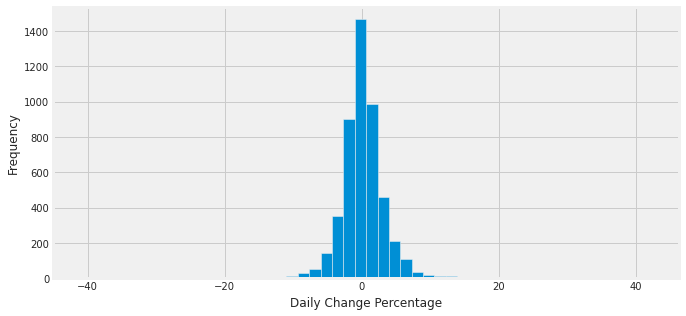

count    4869.000000
mean        0.191483
std         3.569732
min       -40.906466
25%        -1.392150
50%         0.039144
75%         1.705514
max        42.223510
Name: daily_change_pct, dtype: float64

In [14]:
nflx['daily_change_pct'].fillna(0)
nflx['daily_change_pct'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily Change Percentage')
plt.ylabel('Frequency')
plt.show()
nflx.daily_change_pct.describe()

<AxesSubplot:>

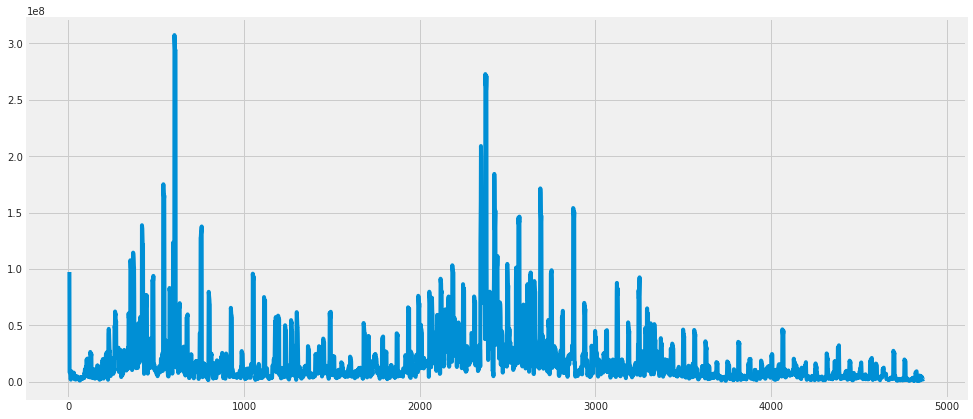

In [15]:
nflx_vol = nflx['Volume'].rolling(7).std()*np.sqrt(7)
nflx_vol.plot(figsize = (15, 7))

In [16]:
def daily_trend(x):
    if x > -0.5 and x <= 0.5:
        return 'No change'
    elif x > 0.5 and x <= 2:
        return 'Upto 2% Increase'
    elif x > -2 and x <= -0.5:
        return 'Upto 2% Decrease'
    elif x > 2 and x <= 5:
        return '2-5% Increase'
    elif x > -5 and x <= -2:
        return '2-5% Decrease'
    elif x > 5 and x <= 10:
        return '5-10% Increase'
    elif x > -10 and x <= -5:
        return '5-10% Decrease'
    elif x > 10:
        return '>10% Increase'
    elif x <= -10:
        return '>10% Decrease'

In [17]:
nflx['Trend']= np.zeros(nflx['daily_change_pct'].count()+1)
nflx['Trend']= nflx['daily_change_pct'].apply(lambda x:daily_trend(x))
nflx['Trend'].replace('None','No change')
nflx.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA5,SMA20,...,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,daily_change_pct,returns,Trend
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0,NaN,NaN,...,NaN,NaN,1.196429,1.196429,1.196429,1.196429,1.196429,NaN,NaN,None
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0,NaN,NaN,...,NaN,NaN,1.200953,1.197721,1.196961,1.196564,1.196483,1.134294,0.937433,Upto 2% Increase
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0,NaN,NaN,...,NaN,NaN,1.186349,1.193857,1.195400,1.196172,1.196326,-4.368350,-3.775117,2-5% Decrease
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0,NaN,NaN,...,NaN,NaN,1.158757,1.185258,1.191799,1.195250,1.195956,-4.629673,-4.195175,2-5% Decrease
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0,1.147714,NaN,...,NaN,NaN,1.129647,1.174417,1.187078,1.194018,1.195459,-2.912549,-2.718378,2-5% Decrease


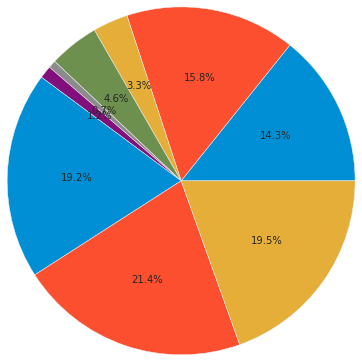

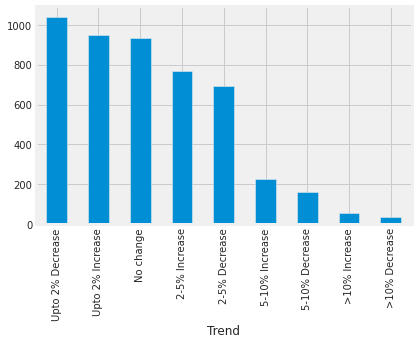

In [18]:
nflx_pie_data = nflx.groupby('Trend')
plt.pie(nflx_pie_data['Trend'].count(), #labels = pie_label, 
        autopct = '%1.1f%%', radius = 2 )
plt.show()
ax=nflx_pie_data['Trend'].count().sort_values(ascending=False).plot.bar(rot=90)
plt.show()

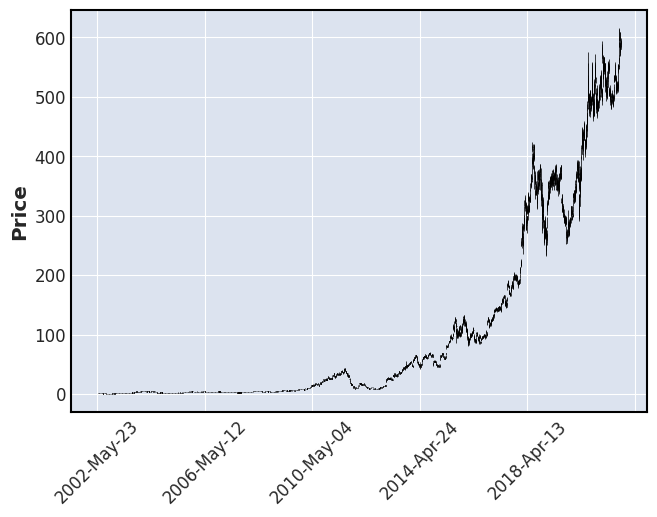

In [19]:
nflx.index = pd.DatetimeIndex(nflx['Date'])
mpf.plot(nflx)

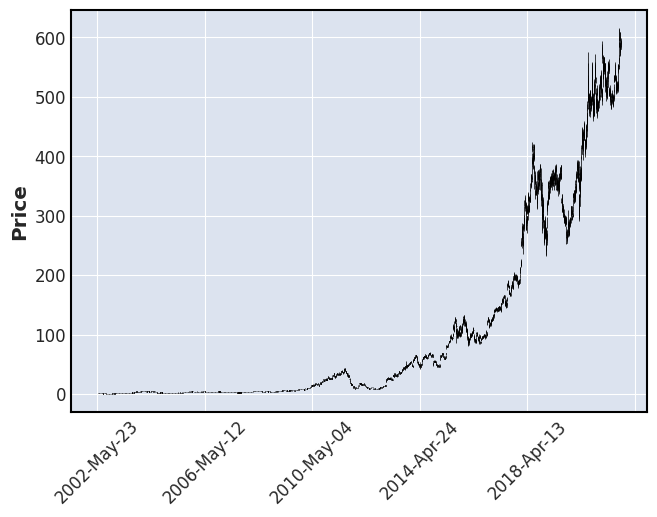

In [21]:
nflx.index = pd.DatetimeIndex(nflx['Date'])
mpf.plot(nflx)

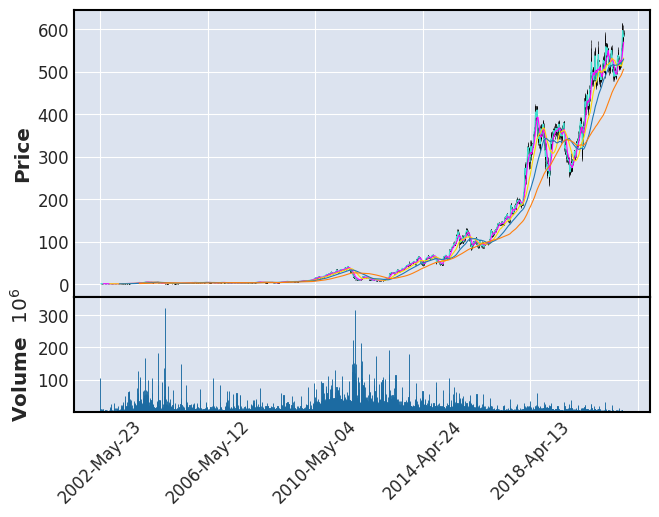

In [71]:
mpf.plot(nflx, type='candle', mav = (7, 30, 90, 180, 365), volume = True)